In [1]:
#Imports 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from seaborn import load_dataset 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Read the dataframe
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


                      missing_values   percent_missing %
fixed acidity                       0                0.0
volatile acidity                    0                0.0
citric acid                         0                0.0
residual sugar                      0                0.0
chlorides                           0                0.0
free sulfur dioxide                 0                0.0
total sulfur dioxide                0                0.0
density                             0                0.0
pH                                  0                0.0
sulphates                           0                0.0
alcohol                             0                0.0
quality                             0                0.0


Text(0.5, 0, 'Missing Values')

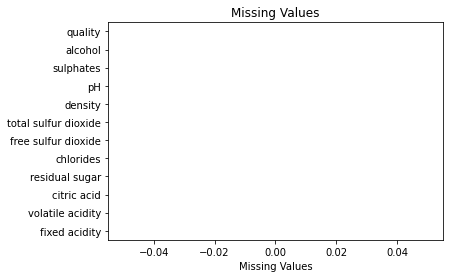

In [3]:
# Check nulls 
# number of missing values in the dataset
missing_values = df.isnull().sum() 

# missing value percent %
percent_missing = missing_values / df.shape[0]*100 

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}

#Constructing DataFrame from a dictionary 
frame = pd.DataFrame(value) 
print(frame)
df.isnull().sum().sort_values().plot(kind="barh", title="Missing Values");
plt.xlabel('Missing Values')
#There is no null values, so the visuallization empty.
#Data is clean 

In [4]:
#Drop duplicates 
df= df.drop_duplicates()

In [5]:
df.shape
#Notice that number of rows was 1599  and now it's 1359, so there were some duplicates

(1359, 12)

## EDA

In [6]:
#Exploring 
df.info()
#All columns are numerical values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [7]:
#EXPLORING DATA 
df.describe()
# We can see that quality min = 3 and max =8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# check the corraltion of the target and other features 
df.corrwith(df["quality"]).sort_values( ascending=False)
#We can see that the corralations are sotred based on the best
#Normally it has perfect corralation with itself
#Alcohol then sulphates have a good corraltaion

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
dtype: float64

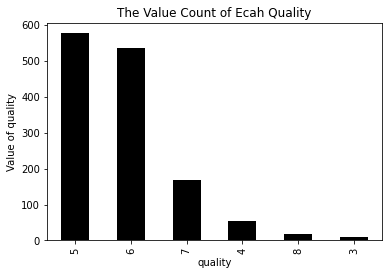

In [9]:
df["quality"].value_counts().plot.bar(color='black')
plt.title("The Value Count of Ecah Quality")
plt.xlabel("quality")
plt.ylabel("Value of quality")
plt.show()
#We can see that most wine has good quality since 5,6,7,has more values than 3 and 4
#However, we can see also that 8 which is the best quality is rare, and 3 which is not good quality also very rare in data

# Logestic Regression

#### First step is changeing the quality values from 6 different values to binary (0 and 1).1 is good, and 0 is bad. The range is more than 5 is good, and less is bad

In [10]:
#First step is changeing the quality values from 6 different values to binary (0 and 1)
quality_target=[]
for i in df["quality"]:
    if i<=5:
        quality_target.append(0)
    else:
        quality_target.append(1)

df['quality_target']=quality_target   

<ipython-input-10-9b1f944099f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality_target']=quality_target


In [11]:
#the new taget now is quality_target
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


Features that affect wine quality : 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' .

In [12]:
#All features 
X=df.drop(['quality','quality_target'],axis=1)
y=df.quality_target

In [13]:
#splitting 80% data for training and 20% data for testing.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [14]:
# Building model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#prediction
y_pred=logreg.predict(x_test)

In [16]:
# Create dataframe to compare real value vs. preduction 
df1 = pd.DataFrame({'Real_Value': y_test, 'Predicted_Value': y_pred})
df1
#looks good

,Real_Value,Predicted_Value
55,0,0
1291,1,1
1544,1,1
593,0,0
1261,0,0
...,...,...
1086,1,1
662,1,0
279,1,1
1111,1,1


In [17]:
#Check predictions 
df1.sample(5)

,Real_Value,Predicted_Value
926,1,1
683,0,1
428,0,0
329,0,1
1461,0,0


### Evaluation the model

In [18]:
#Starting with accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [19]:
#Accuracy alone is not enough
#Let's see the confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#True Negative 98
#True Positive 106
#Flase Positive 37
#False Negative 31
cf_matrix 

array([[ 98,  37],
       [ 31, 106]], dtype=int64)

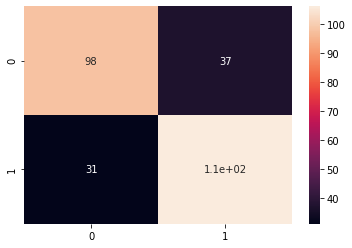

In [26]:
#visualize confusion_matrix
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [21]:
#evaluation by Precision and Recall
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7412587412587412
Recall: 0.7737226277372263
